<a href="https://colab.research.google.com/github/Srinidhi123842/House-Price-Prediction/blob/main/House_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving house_prices_dataset.csv to house_prices_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv('house_prices_dataset.csv')
df.head()

,area,bedrooms,age,price
0,2600,4,5,5500000
1,3000,3,10,5650000
2,3200,4,8,6100000
3,3600,3,5,6800000
4,4000,5,2,7250000


In [ ]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      10 non-null     int64
 1   bedrooms  10 non-null     int64
 2   age       10 non-null     int64
 3   price     10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes

Missing values:
 area        0
bedrooms    0
age         0
price       0
dtype: int64


,area,bedrooms,age,price
count,10.000000,10.000000,10.000000,1.000000e+01
mean,3190.000000,3.500000,7.100000,6.090000e+06
std,409.471204,0.849837,3.665151,6.221825e+05
min,2600.000000,2.000000,2.000000,5.200000e+06
25%,2925.000000,3.000000,5.000000,5.662500e+06
50%,3150.000000,3.500000,6.500000,6.050000e+06
75%,3375.000000,4.000000,8.750000,6.375000e+06
max,4000.000000,5.000000,15.000000,7.250000e+06


In [ ]:
x = df[['area', 'bedrooms', 'age']]
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)
for actual, predicted in zip(y_test, y_pred):
  print(f"Actual Price: Rs{actual:.0f}, Predicted Price: Rs{predicted:.0f}")

Actual Price: Rs6100000, Predicted Price: Rs5926086
Actual Price: Rs6000000, Predicted Price: Rs5851276


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Dquared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Dquared Error (MSE): 26182492998.55
R^2 Score: -9.47


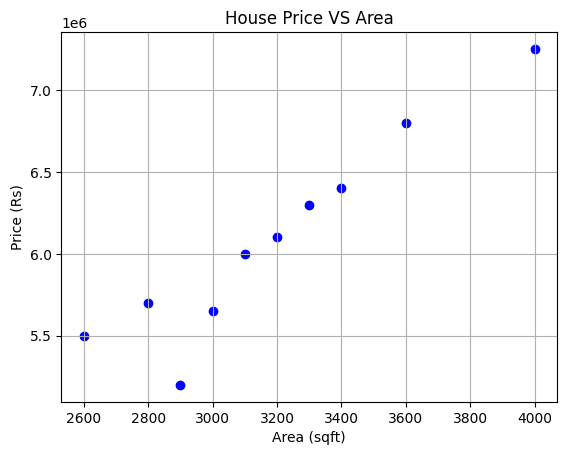

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['area'], df['price'], color='blue', marker='o')
plt.title("House Price VS Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Rs)")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
new_data = pd.DataFrame([[3300, 3, 5]], columns=['area', 'bedrooms', 'age'])
predicted_price = model.predict(new_data)
print(f"Predicted Price for the house: Rs{int(predicted_price[0])}")

Predicted Price for the house: Rs6434013


In [ ]:
#multiple house inputs

houses = [
    [3000, 3, 5],
    [3500, 4, 3],
    [2800, 2, 8],
    [4000, 5, 3]
]

houses_df = pd.DataFrame(houses, columns=['area', 'bedrooms', 'age'])
predicted_prices = model.predict(houses_df)
for i, price in enumerate(predicted_prices):
  print(f"House {i+1} Predicted Price: Rs{int(price)}")

House 1 Predicted Price: Rs6084987
House 2 Predicted Price: Rs6712677
House 3 Predicted Price: Rs5718809
House 4 Predicted Price: Rs7165341
